# System analysis

### 1) Load data from BIN files

In [114]:
### Load data from disk
import pickle
with open('aida_agdistis.bin', 'rb') as outfile:
    aida_agd_articles=pickle.load(outfile)
with open('wes2015_agdistis.bin', 'rb') as outfile:
    wes_agd_articles=pickle.load(outfile)
with open('aida_spotlight.bin', 'rb') as outfile:
    aida_spot_articles=pickle.load(outfile)
with open('wes2015_spotlight.bin', 'rb') as outfile:
    wes_spot_articles=pickle.load(outfile)
    
wes_title='wes2015'
aida_title='aida'

In [115]:
import utils
import plot_utils
import time
from collections import defaultdict

**1.1. Pick dataset**

In [116]:
print(type(aida_agd_articles))
articles=aida_spot_articles.union(wes_spot_articles)
articles=aida_agd_articles.union(wes_agd_articles)
print(len(articles))
skip_nils=True

<class 'set'>
1759


### 2) Overall performance

<span style="background-color:lightgreen">Section 6.1. of the paper</span>

In [117]:
plot_utils.overall_performance(articles, skip_nils)

26695 56404


0.4732820367349833

### 3) Correlation between FORM frequency and accuracy

<span style="background-color:lightgreen">Section 6.2. of the paper</span>

<span style="background-color:yellow">TODO: REFACTOR</span>

**3.1. Correct and total amount per form**

In [118]:
correct_by_form = defaultdict(int)
total_by_form = defaultdict(int)
for article in articles:
    for entity in article.entity_mentions:
        if entity.sys_link and (not skip_nils or entity.gold_link!='--NME--'):
            if entity.sys_link==entity.gold_link:
                correct_by_form[entity.mention]+=1
            total_by_form[entity.mention]+=1

**3.2. Aggregate per frequency**

In [119]:
from collections import OrderedDict
agg_per_frequency=OrderedDict()
forms_by_count=defaultdict(set)
for form, count in total_by_form.items():
    str_count=str(count)
    if count not in agg_per_frequency:
        agg_per_frequency[count]={'c':0, 't':0}
    agg_per_frequency[count]['c']+=correct_by_form[form]
    agg_per_frequency[count]['t']+=count
    forms_by_count[count].add(form)
print(agg_per_frequency)

OrderedDict([(184, {'c': 5, 't': 184}), (102, {'c': 122, 't': 204}), (147, {'c': 147, 't': 294}), (113, {'c': 0, 't': 113}), (1, {'c': 6639, 't': 11830}), (3, {'c': 2126, 't': 3957}), (132, {'c': 126, 't': 132}), (2, {'c': 3240, 't': 5912}), (464, {'c': 0, 't': 464}), (157, {'c': 115, 't': 157}), (6, {'c': 1097, 't': 2070}), (96, {'c': 8, 't': 96}), (143, {'c': 12, 't': 143}), (7, {'c': 790, 't': 1876}), (28, {'c': 28, 't': 252}), (4, {'c': 1495, 't': 3044}), (15, {'c': 211, 't': 720}), (210, {'c': 303, 't': 420}), (13, {'c': 269, 't': 988}), (43, {'c': 17, 't': 86}), (5, {'c': 1160, 't': 2490}), (74, {'c': 65, 't': 222}), (71, {'c': 0, 't': 71}), (49, {'c': 49, 't': 147}), (9, {'c': 562, 't': 1548}), (33, {'c': 22, 't': 165}), (41, {'c': 0, 't': 205}), (38, {'c': 68, 't': 152}), (69, {'c': 32, 't': 138}), (26, {'c': 135, 't': 442}), (11, {'c': 379, 't': 1012}), (58, {'c': 8, 't': 116}), (27, {'c': 103, 't': 378}), (8, {'c': 576, 't': 1560}), (109, {'c': 162, 't': 218}), (29, {'c': 66,

In [120]:
accs=OrderedDict()
for key in sorted(agg_per_frequency, reverse=True):
    acc=agg_per_frequency[key]['c']*100.0/agg_per_frequency[key]['t']
    print(key, acc, forms_by_count[key])
    accs[key]=acc

464 0.0 {'U.S.'}
351 89.74358974358974 {'Germany'}
274 67.51824817518248 {'France'}
237 58.22784810126582 {'England'}
210 72.14285714285714 {'German', 'Australia'}
195 94.35897435897436 {'Italy'}
185 95.67567567567568 {'Spain'}
184 2.717391304347826 {'Britain'}
180 85.0 {'Russia'}
157 73.2484076433121 {'London'}
156 70.51282051282051 {'China'}
147 50.0 {'French', 'LONDON'}
143 8.391608391608392 {'NEW YORK'}
139 66.18705035971223 {'Japan'}
132 95.45454545454545 {'United States'}
129 67.44186046511628 {'Russian'}
116 82.32758620689656 {'mathematics', 'Sweden'}
113 0.0 {'British'}
109 74.31192660550458 {'Israel', 'Reuters'}
103 30.097087378640776 {'Pakistan'}
102 59.80392156862745 {'Paris', 'American'}
101 0.0 {'English'}
98 46.93877551020408 {'Iraq', 'Belgium'}
96 8.333333333333334 {'Europe'}
95 58.94736842105263 {'Berlin'}
93 93.54838709677419 {'Clinton'}
90 37.77777777777778 {'India'}
85 30.58823529411765 {'CHICAGO', 'Netherlands'}
84 77.38095238095238 {'Austria'}
81 87.65432098765432 

**3.3. Plot frequency distribution**

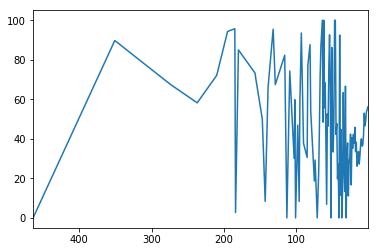

In [121]:
import matplotlib.pyplot as plt
plt.xlim(list(accs.keys())[0],list(accs.keys())[-1])
plt.plot(list(accs.keys()), list(accs.values()))
plt.show()

### 4) Correlation between instance frequency and accuracy

<span style="background-color:lightgreen">Section 6.3. of the paper</span>

<span style="background-color:yellow">TODO: REFACTOR</span>

**4.1. Correct and total amount per URI**

In [122]:
correct_by_uri = defaultdict(int)
total_by_uri = defaultdict(int)
for article in articles:
    for entity in article.entity_mentions:
        if entity.sys_link and (not skip_nils or entity.gold_link!='--NME--'):
            if entity.sys_link==entity.gold_link:
                correct_by_uri[entity.gold_link]+=1
            total_by_uri[entity.gold_link]+=1

**4.2. Aggregate per frequency**

In [123]:
from collections import OrderedDict
agg_per_frequency=OrderedDict()
uris_by_count=defaultdict(set)
for uri, count in total_by_uri.items():
    str_count=str(count)
    if count not in agg_per_frequency:
        agg_per_frequency[count]={'c':0, 't':0}
    agg_per_frequency[count]['c']+=correct_by_uri[uri]
    agg_per_frequency[count]['t']+=count
    uris_by_count[count].add(uri)
print(agg_per_frequency)

OrderedDict([(287, {'c': 12, 't': 287}), (752, {'c': 193, 't': 752}), (308, {'c': 265, 't': 308}), (7, {'c': 733, 't': 1820}), (3, {'c': 1773, 't': 3462}), (1, {'c': 4123, 't': 7689}), (166, {'c': 9, 't': 166}), (24, {'c': 127, 't': 408}), (172, {'c': 32, 't': 172}), (44, {'c': 35, 't': 220}), (8, {'c': 815, 't': 1792}), (563, {'c': 473, 't': 563}), (15, {'c': 424, 't': 1005}), (27, {'c': 90, 't': 243}), (170, {'c': 57, 't': 170}), (4, {'c': 1411, 't': 3044}), (10, {'c': 727, 't': 1670}), (56, {'c': 109, 't': 224}), (2, {'c': 2609, 't': 4992}), (38, {'c': 123, 't': 304}), (14, {'c': 344, 't': 840}), (6, {'c': 1008, 't': 1950}), (39, {'c': 103, 't': 234}), (5, {'c': 1182, 't': 2405}), (12, {'c': 486, 't': 1308}), (13, {'c': 421, 't': 1196}), (64, {'c': 205, 't': 320}), (52, {'c': 61, 't': 104}), (36, {'c': 119, 't': 288}), (9, {'c': 684, 't': 1485}), (20, {'c': 228, 't': 380}), (49, {'c': 87, 't': 196}), (110, {'c': 110, 't': 110}), (11, {'c': 636, 't': 1419}), (80, {'c': 1, 't': 80}), 

In [124]:
accs=OrderedDict()
for key in sorted(agg_per_frequency, reverse=True):
    acc=agg_per_frequency[key]['c']*100.0/agg_per_frequency[key]['t']
    print(key, acc, uris_by_count[key])
    accs[key]=acc

752 25.664893617021278 {'United_States'}
563 84.01420959147424 {'Germany'}
381 49.08136482939633 {'France'}
336 72.91666666666667 {'Russia'}
308 86.03896103896103 {'London'}
287 4.181184668989547 {'United_Kingdom'}
255 72.54901960784314 {'Italy'}
226 64.60176991150442 {'England'}
222 81.53153153153153 {'Spain'}
213 89.67136150234742 {'Australia'}
195 49.23076923076923 {'Israel'}
191 58.1151832460733 {'China'}
185 3.2432432432432434 {'Iraq'}
172 18.6046511627907 {'New_York_City'}
170 33.529411764705884 {'Netherlands'}
166 5.421686746987952 {'Europe'}
163 57.05521472392638 {'Japan'}
156 52.56410256410256 {'Paris'}
139 97.12230215827338 {'Belgium'}
131 90.07633587786259 {'Sweden'}
129 68.9922480620155 {'Mathematics'}
117 94.87179487179488 {'Bill_Clinton'}
116 62.06896551724138 {'Canada'}
112 70.08928571428571 {'Switzerland', 'Poland'}
110 100.0 {'Reuters'}
109 52.293577981651374 {'Berlin'}
104 32.69230769230769 {'India'}
103 0.970873786407767 {'Year'}
97 32.98969072164948 {'Brazil'}
95 68

In [125]:
print(agg_per_frequency)

OrderedDict([(287, {'c': 12, 't': 287}), (752, {'c': 193, 't': 752}), (308, {'c': 265, 't': 308}), (7, {'c': 733, 't': 1820}), (3, {'c': 1773, 't': 3462}), (1, {'c': 4123, 't': 7689}), (166, {'c': 9, 't': 166}), (24, {'c': 127, 't': 408}), (172, {'c': 32, 't': 172}), (44, {'c': 35, 't': 220}), (8, {'c': 815, 't': 1792}), (563, {'c': 473, 't': 563}), (15, {'c': 424, 't': 1005}), (27, {'c': 90, 't': 243}), (170, {'c': 57, 't': 170}), (4, {'c': 1411, 't': 3044}), (10, {'c': 727, 't': 1670}), (56, {'c': 109, 't': 224}), (2, {'c': 2609, 't': 4992}), (38, {'c': 123, 't': 304}), (14, {'c': 344, 't': 840}), (6, {'c': 1008, 't': 1950}), (39, {'c': 103, 't': 234}), (5, {'c': 1182, 't': 2405}), (12, {'c': 486, 't': 1308}), (13, {'c': 421, 't': 1196}), (64, {'c': 205, 't': 320}), (52, {'c': 61, 't': 104}), (36, {'c': 119, 't': 288}), (9, {'c': 684, 't': 1485}), (20, {'c': 228, 't': 380}), (49, {'c': 87, 't': 196}), (110, {'c': 110, 't': 110}), (11, {'c': 636, 't': 1419}), (80, {'c': 1, 't': 80}), 

In [126]:
list(accs.values())

[25.664893617021278,
 84.01420959147424,
 49.08136482939633,
 72.91666666666667,
 86.03896103896103,
 4.181184668989547,
 72.54901960784314,
 64.60176991150442,
 81.53153153153153,
 89.67136150234742,
 49.23076923076923,
 58.1151832460733,
 3.2432432432432434,
 18.6046511627907,
 33.529411764705884,
 5.421686746987952,
 57.05521472392638,
 52.56410256410256,
 97.12230215827338,
 90.07633587786259,
 68.9922480620155,
 94.87179487179488,
 62.06896551724138,
 70.08928571428571,
 100.0,
 52.293577981651374,
 32.69230769230769,
 0.970873786407767,
 32.98969072164948,
 68.42105263157895,
 67.02127659574468,
 38.63636363636363,
 81.60919540229885,
 20.238095238095237,
 0.0,
 100.0,
 1.25,
 0.0,
 75.32467532467533,
 73.02631578947368,
 13.333333333333334,
 1.408450704225352,
 33.57142857142857,
 7.246376811594203,
 97.05882352941177,
 33.333333333333336,
 20.0,
 64.0625,
 34.92063492063492,
 25.666666666666668,
 71.1864406779661,
 31.03448275862069,
 0.0,
 48.660714285714285,
 55.9090909090909

**4.3. Plot accuracies**

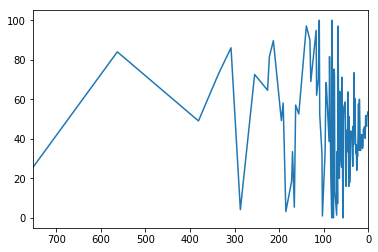

In [127]:
import matplotlib.pyplot as plt
plt.xlim(list(accs.keys())[0],list(accs.keys())[-1])
plt.plot(list(accs.keys()), list(accs.values()))
plt.show()

### 5) Correlation between instance ranks (of a form) and accuracy

<span style="background-color:lightgreen">Section 6.4. of the paper</span>


**5.1. Collect interpretations for a form**


In [128]:
interpretations=defaultdict(set)
for article in articles:
    for mention in article.entity_mentions:
        form=mention.mention
        meaning=mention.gold_link
        if not skip_nils or meaning!='--NME--':
            interpretations[form].add(meaning)

In [129]:
interpretations['Marseille']

{'Marseille', 'Olympique_de_Marseille'}

**5.2. Compute ambiguity of a form**


In [130]:
ambiguity={}
for form,meanings in interpretations.items():
    ambiguity[form]=len(meanings)
ambiguity

{'Britain': 4,
 'American': 3,
 'LONDON': 1,
 'British': 7,
 'British Airways Plc': 1,
 'American Airlines': 1,
 'Monopolies and Mergers Commission': 1,
 'Ian Lang': 1,
 'United States': 3,
 'Office of Fair Trading': 1,
 'U.S.': 2,
 'London': 4,
 'British Airways': 1,
 'London Heathrow': 1,
 'Europe': 1,
 'AMR Corp.': 1,
 'USAir': 1,
 'Office of Fair Trade': 1,
 'EDBERG': 1,
 'NEW YORK': 4,
 'Stefan Edberg': 1,
 'U.S. Open': 2,
 'Bernd Karbacher': 1,
 'Edberg': 1,
 'Karbacher': 1,
 'German': 4,
 'Grand Slam': 1,
 'Ivan Lendl': 1,
 'Wimbledon': 3,
 'Richard Krajicek': 1,
 'Krajicek': 1,
 'Dutch': 4,
 'Paul Haarhuis': 1,
 'October 26': 1,
 '1654': 1,
 'Italian': 4,
 'physician': 1,
 'epidemiologist': 1,
 'anatomist': 1,
 'Giovanni Maria Lancisi': 1,
 'hygienist': 1,
 'mosquitoes': 1,
 'malaria': 1,
 'cardiovascular diseases': 1,
 'Latinized name': 1,
 'Johannes Maria Lancisius': 1,
 'Collegio Romano': 1,
 'University of Rome': 1,
 'philosophy': 1,
 'liberal arts': 1,
 'theology': 1,
 'na

**5.3. Aggregation per ambiguity**



In [131]:
agg_per_ambiguity=defaultdict(int)
for form, amb in ambiguity.items():
    agg_per_ambiguity[amb]+=1

In [132]:
agg_per_ambiguity

defaultdict(int, {1: 18234, 2: 813, 3: 160, 4: 49, 5: 16, 6: 6, 7: 1, 12: 1})

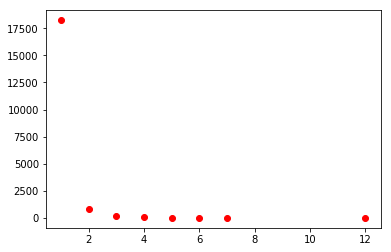

In [133]:
plt.plot(list(agg_per_ambiguity.keys()), list(agg_per_ambiguity.values()), 'ro')
plt.show()

In [134]:
sum(i for j,i in agg_per_ambiguity.items() if j>1)

1046

#### AIDA: This means that there are 622 (or 477 without NILs) out of ~11k forms that have some ambiguity in the data

**5.4. Aggregate per rank**



In [135]:
correct_per_form=defaultdict(dict)
total_per_form=defaultdict(dict)
for article in articles:
    for mention in article.entity_mentions:
        form=mention.mention
        meaning=mention.gold_link
        if skip_nils and meaning=='--NME--':
            continue
        if ambiguity[form]==1:
            continue
        if meaning not in total_per_form[form]:
            total_per_form[form][meaning]=0
            correct_per_form[form][meaning]=0
        total_per_form[form][meaning]+=1
        if meaning==mention.sys_link:
            correct_per_form[form][meaning]+=1

In [136]:
len(total_per_form)

1046

In [137]:
correct_per_rank, total_per_rank = plot_utils.prepare_ranks(correct_per_form, total_per_form)
print(correct_per_rank)
print(total_per_rank)

Britain
American
British
United States
U.S.
London
NEW YORK
U.S. Open
German
Wimbledon
Dutch
Italian
Liechtenstein
Republic of Ireland
World Cup
Irish
Ireland
BSE
Oxford
Nature
European
Chicago
ENGLAND
England
DUTCH
Netherlands
Hungarian
university
French
prize
CHICAGO
Finnish
Israel
Palestinians
Palestinian
Gaza
Texas
Indonesia
Newcastle
Moldova
Southampton
Alan
English
Leicester
Leicestershire
Chester-le-Street
Tunbridge Wells
Kent
Surrey
Hove
Sussex
Portsmouth
Hampshire
Chesterfield
Bristol
India
Indian
Sri Lanka
Belgium
poet
rank
Russian
Germany
Germans
travels
Italy
health
specimens
French Revolution
parents
Berlin
family
France
circle
Switzerland
children
1815
diary
return
Academy of Sciences
1829
collaboration
1830
expedition
Wales
Cardiff
Scotland
Liberian
Milan
Italians
Spain
Spaniard
Flushing Meadows
Bulgaria
South Africa
Poland
Swiss
Japan
Czech
Austrian
China
Greek
Pluto
1930
University of Frankfurt
1924
1929
Stuttgart
August
Cornell
Benetton
Russia
Brazilian
Vasco da Gama


defaultdict(<class 'float'>, {1: 0.4126205083260298, 2: 0.1861198738170347, 3: 0.10698689956331878, 4: 0.03389830508474576, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0})


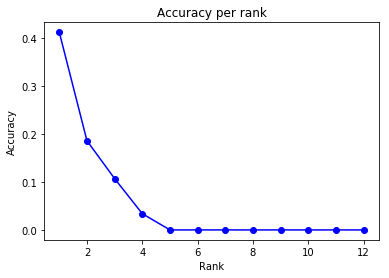

In [138]:
plot_utils.plot_ranks(correct_per_rank, total_per_rank)

### 6) Ranks of the top-N most frequent forms

<span style="background-color:lightgreen">Section 6.5. of the paper</span>


In [139]:
# Top 10 have form frequency of >135

min_frequency=135
correct_per_rank, total_per_rank = plot_utils.prepare_ranks(correct_per_form, total_per_form, min_frequency=min_frequency)
print(correct_per_rank)
print(total_per_rank)

Britain
U.S.
London
NEW YORK
German
England
French
Germany
Italy
France
Spain
Japan
China
Russia
Australia
defaultdict(<class 'int'>, {1: 1772, 2: 4, 3: 13, 4: 0, 5: 0, 6: 0})
defaultdict(<class 'int'>, {1: 2879, 2: 266, 3: 55, 4: 26, 5: 5, 6: 1})


defaultdict(<class 'float'>, {1: 0.6154914901007295, 2: 0.015037593984962405, 3: 0.23636363636363636, 4: 0.0, 5: 0.0, 6: 0.0})


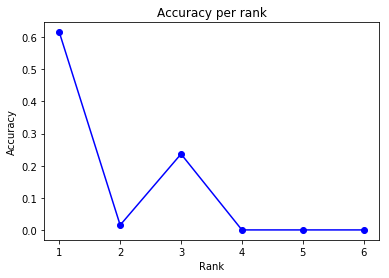

In [140]:
plot_utils.plot_ranks(correct_per_rank, total_per_rank)

#### The reason for the peak in form 3 is NEW YORK, where the state is third most common in the corpus

In [141]:
form='NEW YORK'
print(total_per_form[form])
print(correct_per_form[form])

{'New_York_City': 91, 'New_York': 12, 'New_York_Yankees': 36, 'New_York_Knicks': 4}
{'New_York_City': 0, 'New_York': 12, 'New_York_Yankees': 0, 'New_York_Knicks': 0}


In [142]:
form='Germany'
print(total_per_form[form])
print(correct_per_form[form])

{'Germany': 342, 'Germany_national_football_team': 6, 'Germany_Fed_Cup_team': 1, 'Germany_Davis_Cup_team': 1, "Germany_men's_national_ice_hockey_team": 1}
{'Germany': 315, 'Germany_national_football_team': 0, 'Germany_Fed_Cup_team': 0, 'Germany_Davis_Cup_team': 0, "Germany_men's_national_ice_hockey_team": 0}


#### What is going on with China?

In [143]:
for a in articles:
    for m in a.entity_mentions:
        if m.mention=='China':
            print(m.gold_link, m.sys_link)

China China
China China_Daily
China China_Daily
China China_Daily
China China_Daily
China Human_rights_in_India
China Human_rights_in_India
China Human_rights_in_India
China Human_rights_in_India
China Human_rights_in_India
China Human_rights_in_India
China China
China China
China China
China China
Qing_dynasty China
China --NME--
China --NME--
China Northwest_China
China --NME--
China China
China China
China China
China China
China China
China China
China_national_football_team China
China_national_football_team China
China China_Daily
China China_Daily
China China_Daily
China China
China China
China China
China China
China China
China China
China China
China China
China China
China_national_football_team China
China_national_football_team China
China --NME--
China --NME--
China --NME--
China --NME--
China --NME--
China --NME--
China China
China China
China China
China China
China China
China China
China China
China China
China South_China_AA
China China
China China
China China
China 

### 7) PageRank analysis

<span style="background-color:lightgreen">Section 6.6. of the paper</span>

<span style="background-color:red">TODO: IMPLEMENT</span>

### 8) Notes

* connectivity should reflect popularity -> try pageRank
* this is the hardest part of the EL task
* sometimes nils are most frequent
* NILs - maybe set them aside
* very basic baseline - throw away dbpedia, randomly assign from the training data - build this baseline
* always try the most frequent one
* popular, transparent, and the best one - distinguish between open source systems
* look at coreference too (noun phrases and pronouns)
* annotation or not of coreferential expressions (we can also just use them in a solution)? 

#### Summary of the todos:
* Another system or 2 (spotlight) - PIEK: take popular, transparent, and the best one
* More datasets
* NIL entities
* Baseline
* Coreference